# Support Vector Regression

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
dataset = pd.read_csv('../Machine_Learning/Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
# reshaping the y into 2-D matrix for Feature Scaling because Standard Scalar accepts 2-D matrix
y = y.reshape(len(y),1)

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training SVR model on the dataset

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

# Predicting a new result

In [11]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))


array([170370.0204065])

# Visualising SVR results

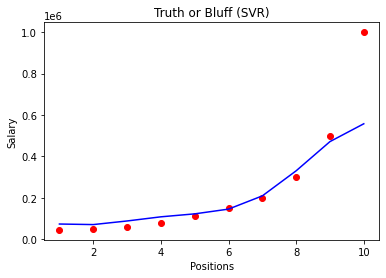

In [12]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Positions')
plt.ylabel('Salary')
plt.show()

# Visualising the SVR results (for higher resolution and smoother curve) 

In [17]:
print(sc_y.inverse_transform(y).shape)

(10, 1)


ValueError: x and y must be the same size

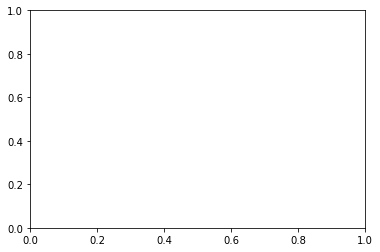

In [14]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(sc_X.inverse_transform(X_grid)),1)
plt.scatter(sc_X.inverse_transform(X_grid),sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X_grid),sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Positions')
plt.ylabel('Salary')
plt.show()

In [18]:
print(sc_X.inverse_transform(X_grid).shape)

(90, 1)


In [24]:
print(y.shape)

(10, 1)
